<a href="https://colab.research.google.com/github/JoaoCioffi/Kagglin/blob/main/Airbnb/Amsterdam/Airbnb_Amsterdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
>>> Airbnb Project - Predicting the price of Airbnb accommodations in Amsterdam
---
---

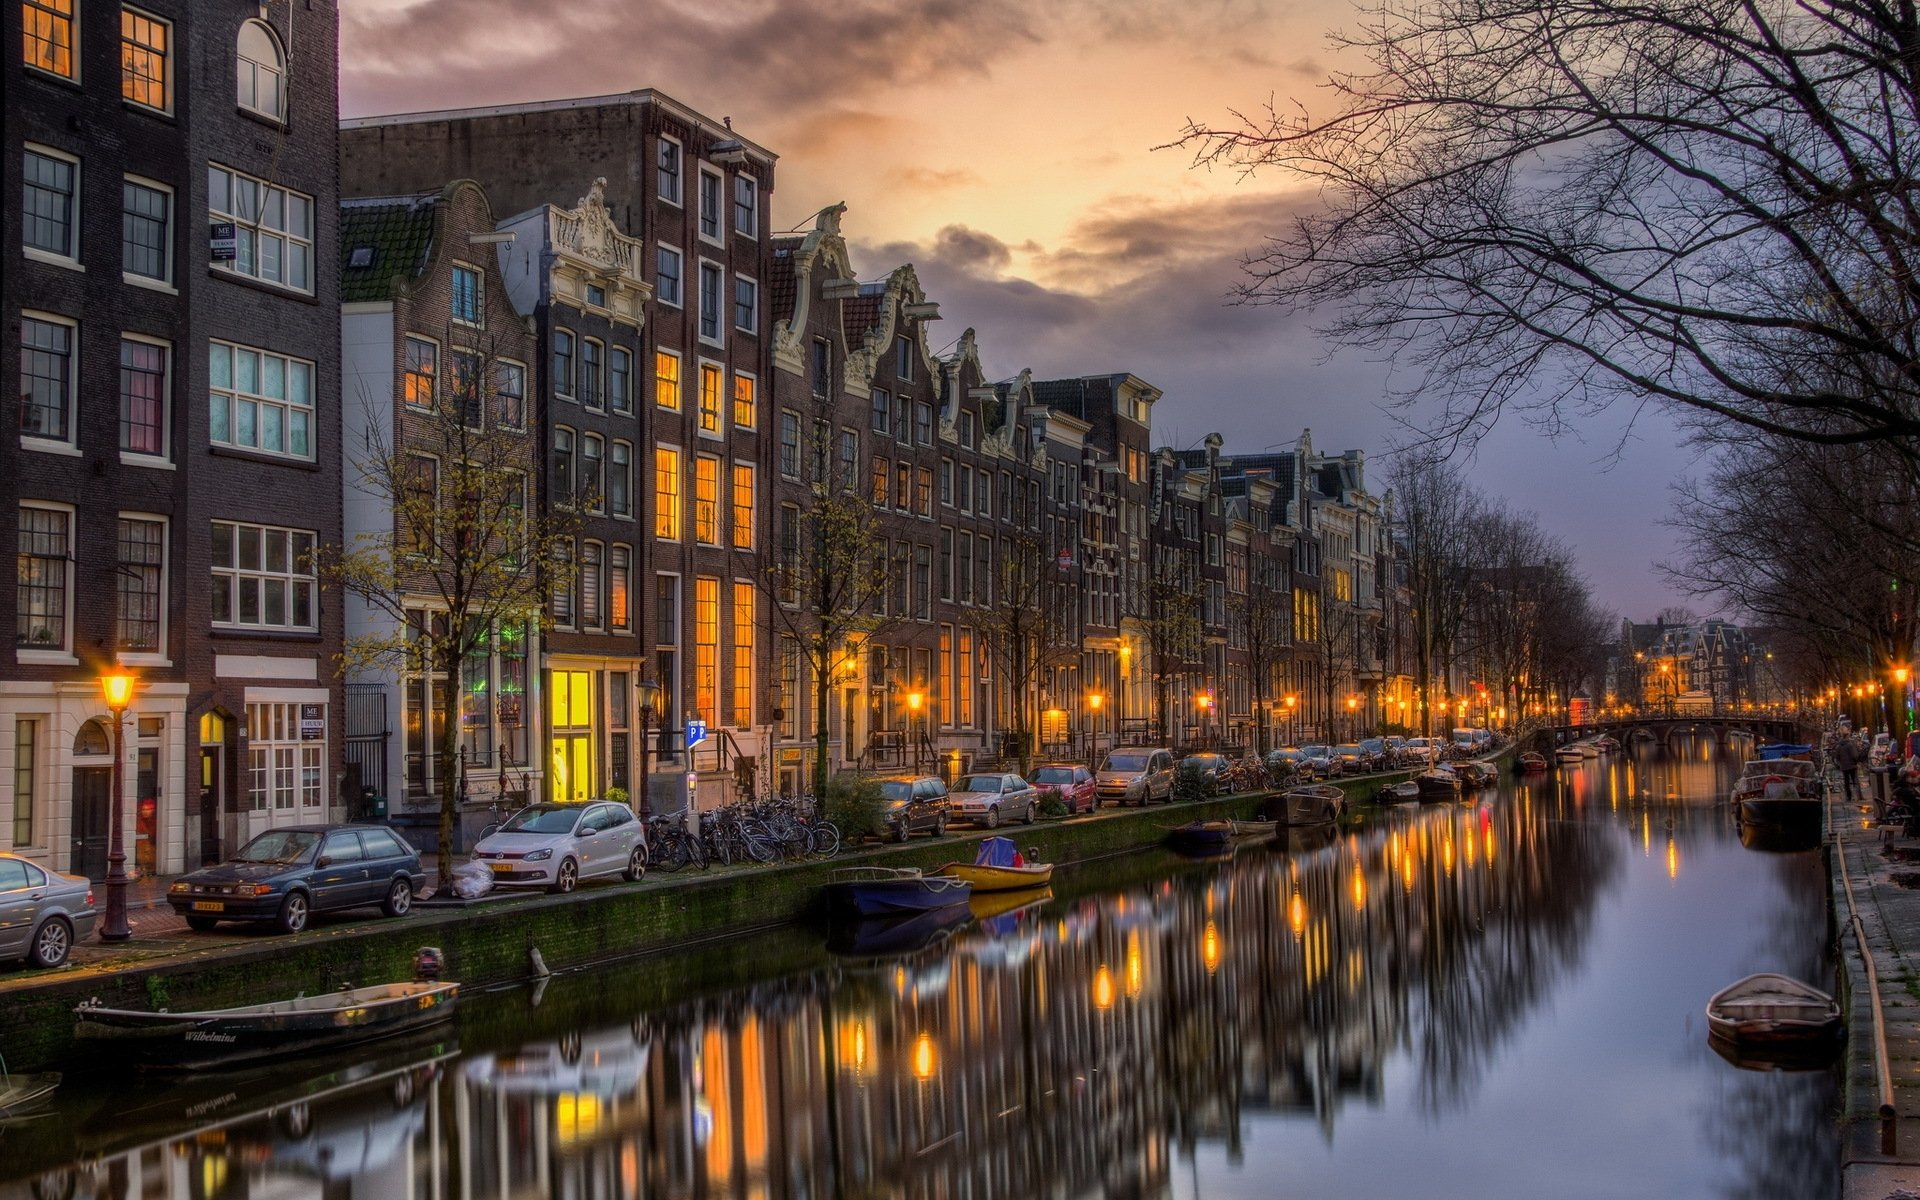

# Problem Statement:

> Source: <https://medium.com/@uzairaslam.vf/predicting-the-price-of-airbnb-accommodations-in-amsterdam-using-machine-learning-3e695a949091>

> Official Database: <http://insideairbnb.com/get-the-data.html>

# Metadata: 
> Source: 
<https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896>
- id: Airbnb's unique identifier for the listing;
- name: Name of the listing;
- host_id: Airbnb's unique identifier for the host/user
- host_name: Name of the host. Usually just the first name;
- neighborhood_group: The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles;
- neighborhood: No metadata available
- latitude: Uses the World Geodetic System (WGS84) projection for latitude and longitude;
- longitude: Uses the World Geodetic System (WGS84) projection for latitude and longitude;
- room_type: All homes are grouped into the following three room types: (1) Entire place, (2) Private room and (3) Shared room. ***Entire places*** are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: "Host occupies first floor of the home"), and provide further details on the listing. ***Private rooms*** are great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your own private room for sleeping and may share some spaces with others. You might need to walk through indoor spaces that another host or guest may occupy to get to your room. ***Shared rooms*** are for when you don't mind sharing a space with others. When you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people. Shared rooms are popular among flexible travelers looking for new friends and budget-friendly stays.
- price: daily price in local currency
- minimum_nights: minimum number of night stay for the listing (calendar rules may be different)
- number_of_reviews: The number of reviews the listing has
- last_review: The date of the last/newest review
- reviews_per_month: The number of reviews the listing has over the lifetime of the listing
- calculated_host_listings_count: The number of listings the host has in the current scrape, in the city/region geography.
- availability_365: avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked

As the Summers roll over in full swing and in case you’re still struggling to decide upon your most desirable destination of the year — then without further ado, know that Amsterdam awaits you for your most exquisite escapade!

Planning to travel to Amsterdam either for a luxury vacation or on a budget getaway could change into an ambiguous situation when finding the right place to stay. However, on the brighter side, it is never too difficult to stroll around the streets of Amsterdam — owing to the perfect embodiment of it’s European architecture. Delightedly and much to our relief, the Airbnbs all around the city can help you find your desirable accommodation in good value for money and that too in a sound neighbourhood.

As Airbnb is one of the most popular choices for accommodation amongst tourists from all over the world, in this study we'll be unveiling the best Airbnb accommodations in Amsterdam. While exploring the real data set for Amsterdam provided by Airbnb by answering the following questions, out task is to make it easy to select the next travel accommodation on Airbnb in Amsterdam.

1. What is the most popular neighborhood to stay in Amsterdam?

2. What is the average price/night for Airbnb in Amsterdam?

3. What factors influence the price of Airbnb accommodation in Amsterdam?

# Metric:

The most important features that we will be looking into are ‘neighbourhood’, ‘room_type’ and ‘price’.

> Reason to measure the model using ‘rsquared’ value:
- To evaluate the performance of our model we will be using the ‘rsquared’ metric. We will look into the ‘rsquare’ score of our model on train and test data sets to see how our model performed when pricing the price. The goal here is to predict the price of an accommodation by first training the model on the data that the model has seen and then using it to predict the price on the test data set, which the model has not seen before. Hence, here we are dealing with a typical Regression problem. 
- The reason we will be using the ‘rsquared’ value as a metric to evaluate the performance of our Linear Regression model is because it gives a good statistical measure of how the data are to the fitted regression line. Higher the rsquared value, the better the model fits your data, in other words, higher the value of rsquared value, the better the model perform in prediction.
- In short, we can say that since it is a Regression problem, i wanted an evaluation metric for my model which can tell me about the difference between observed and the fitted values. I found rsquared as just the right kind of a metric for my model.
- Rsquared gives us the percentage of the dependant variable variation that the linear model explains and is given by the following equation:

>> 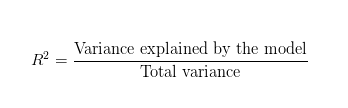

> - Rsquared values vary between 0% to 100% with 0% showing that the model explains no variation in the response variable and 100% showing that the model successfully explains all the variations in the response variable.
- Now to procced further, we will be dropping all the fields that contain any NaN values. The most important fields that we will be using for our model are ‘neighborhood’, ‘room_type’, ‘availability_365’ and ‘number_of_reviews’. We will be processing the data in such a way that we will deal fields like ‘neighborhood’ and ‘room_type’ as categorical values. In the final, data set that we will feed to our model, we will have 29 columns.


# Main Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import patsy as pt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Dataset

In [2]:
df = pd.read_csv('Airbnb_Amsterdam.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.04,1,158
1,9693,Top Location on Canal (Center Flat),32366,Sabine And Sander,NaN,Centrum-West,52.37802,4.89270,Entire home/apt,119,3,55,2018-06-29,0.44,1,17
2,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.72,2,31
3,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.17,1,212
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,217,2020-03-02,2.12,1,235


In [3]:
# DataFrame shape
print('-='*30)
print('|\t\t\t| DF Shape |\t\t\t')
print('|')
print(f'|  Rows: {df.shape[0]}\n|   X\n|  Columns: {df.shape[1]}')
print('-='*30)

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
|			| DF Shape |			
|
|  Rows: 19352
|   X
|  Columns: 16
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# 1- Data Exploration (Understanding and Preparation)

## Dtypes

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19352 entries, 0 to 19351
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19352 non-null  int64  
 1   name                            19319 non-null  object 
 2   host_id                         19352 non-null  int64  
 3   host_name                       19341 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   19352 non-null  object 
 6   latitude                        19352 non-null  float64
 7   longitude                       19352 non-null  float64
 8   room_type                       19352 non-null  object 
 9   price                           19352 non-null  int64  
 10  minimum_nights                  19352 non-null  int64  
 11  number_of_reviews               19352 non-null  int64  
 12  last_review                     

In [6]:
# Changes the variable type
def change_type(df, feature, ast = object):
  """
  df: Pandas DataFrame to be modified
  feature: the column to be modified
  ast: set column astype (if not declared, automatically it will be setted as an object)
  """
  ast = str(ast)
  feature = str(feature)
  df[feature] = df[feature].astype(ast)
  return df

In [7]:
df = change_type(df,'name', 'string')
df = change_type(df,'host_name', 'string')
df = change_type(df,'neighbourhood', 'category')
df = change_type(df,'room_type', 'category')
df = change_type(df,'last_review', 'datetime64[ns]')

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19352 entries, 0 to 19351
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19352 non-null  int64         
 1   name                            19319 non-null  string        
 2   host_id                         19352 non-null  int64         
 3   host_name                       19341 non-null  string        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   19352 non-null  category      
 6   latitude                        19352 non-null  float64       
 7   longitude                       19352 non-null  float64       
 8   room_type                       19352 non-null  category      
 9   price                           19352 non-null  int64         
 10  minimum_nights                  19352 non-null  int64         
 11  nu

## Nulls Quantity per Feature 

In [9]:
df.isna().sum()

id                                    0
name                                 33
host_id                               0
host_name                            11
neighbourhood_group               19352
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2392
reviews_per_month                  2392
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df2 = df.drop(['neighbourhood_group'], axis=1)
df2 = df2.dropna()
print(df2.isna().sum())
print(df2.shape)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
(16926, 15)


## Looking for duplicates

In [11]:
df2[df2['id'].duplicated() == True]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [12]:
df2[df2['name'].duplicated() == True]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
182,439097,Bright apt in central Amsterdam,2181530,Janneke,De Baarsjes - Oud-West,52.36994,4.86707,Entire home/apt,140,4,52,2019-12-30,0.60,1,0
417,779297,Lovely apartment near city centre,4109239,Sevgi,De Pijp - Rivierenbuurt,52.35484,4.90534,Entire home/apt,170,3,12,2018-08-26,0.15,1,0
475,863877,Beautiful apartment in city centre,2620478,Niels,Centrum-Oost,52.36513,4.88719,Entire home/apt,175,2,8,2015-04-07,0.09,1,0
927,1644337,Amsterdam at your feet,3404005,Tijs,Bos en Lommer,52.37570,4.84387,Entire home/apt,82,7,33,2020-02-29,0.41,1,175
1464,2929209,Beautiful apartment near Vondelpark,5349850,Johanna,Zuid,52.34794,4.84615,Entire home/apt,139,2,13,2019-09-15,0.18,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18294,40700663,Spacious apartment with private garden,60974467,Stijn,De Pijp - Rivierenbuurt,52.35216,4.89717,Entire home/apt,200,5,1,2020-01-02,0.19,1,15
18298,40715664,Beautiful room,181701231,Adina,Slotervaart,52.36224,4.82614,Private room,40,1,5,2019-12-29,0.82,1,0
18577,41525474,"Light, bright and quiet apartment close to Pijp",78882048,Nathalie,De Pijp - Rivierenbuurt,52.34123,4.90284,Entire home/apt,85,3,1,2020-02-08,0.24,1,16
18628,41704191,Appartement in Amsterdam,47714642,Quirine,De Pijp - Rivierenbuurt,52.34734,4.90482,Entire home/apt,98,5,1,2020-01-22,0.22,1,0


## Numerical Description

> Taking a look at some statistics of the data set to understand the data better.


In [13]:
df2.select_dtypes(include='number').drop(['id','host_id'], axis = 1).describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16926.000000,16926.000000,16926.000000,16926.000000,16926.000000,16926.000000,16926.000000,16926.00000
mean,52.365473,4.889639,158.408543,3.371145,28.465024,0.745598,1.995805,60.78471
std,0.016357,0.035634,166.662686,13.751224,56.726291,1.216923,5.711936,106.66736
min,52.289270,4.755940,5.000000,1.000000,1.000000,0.010000,1.000000,0.00000
1%,52.317675,4.803685,41.000000,1.000000,1.000000,0.020000,1.000000,0.00000
10%,52.348405,4.850905,75.000000,1.000000,2.000000,0.070000,1.000000,0.00000
25%,52.355300,4.863910,99.000000,2.000000,4.000000,0.170000,1.000000,0.00000
50%,52.364810,4.886990,130.000000,2.000000,11.000000,0.380000,1.000000,0.00000
75%,52.375327,4.909375,180.000000,3.000000,27.000000,0.770000,1.000000,86.00000
90%,52.383980,4.935570,250.000000,5.000000,63.000000,1.685000,2.000000,252.00000


# 2- Business Analysis

## Question 1

> What is the most popular neighborhood to stay in Amsterdam?

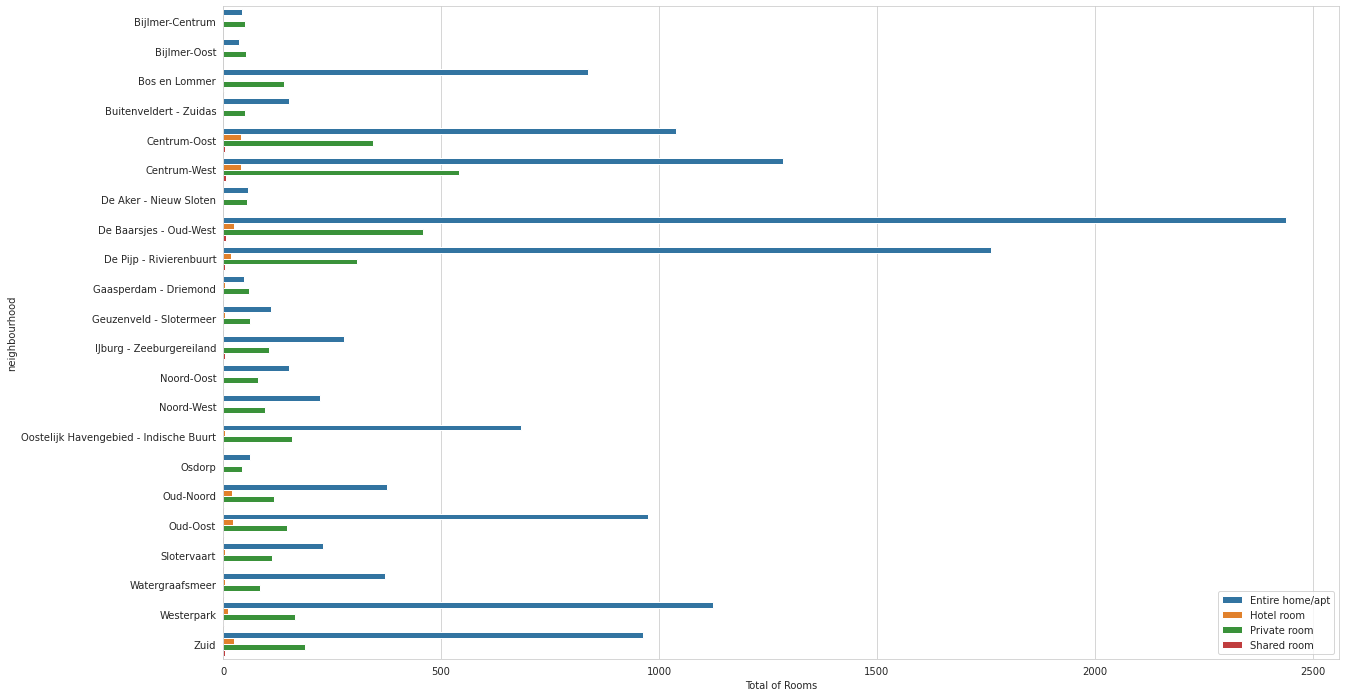

In [31]:
plt.figure(figsize=(20,12))
sns.countplot(y='neighbourhood',data=df2,hue='room_type')
plt.xlabel('Total of Rooms')
plt.legend(loc = 'lower right')

In [32]:
# Total of occurrences for each neighbourhood type (Registered Properties per Neighbourhood)
df2.neighbourhood.value_counts()

De Baarsjes - Oud-West                    2928
De Pijp - Rivierenbuurt                   2090
Centrum-West                              1873
Centrum-Oost                              1428
Westerpark                                1300
Zuid                                      1179
Oud-Oost                                  1145
Bos en Lommer                              978
Oostelijk Havengebied - Indische Buurt     848
Oud-Noord                                  516
Watergraafsmeer                            461
IJburg - Zeeburgereiland                   388
Slotervaart                                347
Noord-West                                 322
Noord-Oost                                 232
Buitenveldert - Zuidas                     200
Geuzenveld - Slotermeer                    175
De Aker - Nieuw Sloten                     114
Gaasperdam - Driemond                      114
Osdorp                                     105
Bijlmer-Centrum                             94
Bijlmer-Oost 

In [33]:
# Total number of reviews for each neighbourhood

neighbourhood_names = list(df2.neighbourhood.value_counts().index)
reviews_counts = [] #List to store the sum of each neighbourhood

#Creating a function to create a list of sum of reviews for each neighbourhood.
def sum_of_reviews(neighbourhood_names):
    
    #Write documentation here
    
    for name in neighbourhood_names:
        
        #sotring the sum of reviews for each 'name' in 'neighbourhood_names' array
        reviews_counts.append(df2.loc[df2['neighbourhood'] == name ]['number_of_reviews'].sum())
        
    return reviews_counts

sum_reviews = sum_of_reviews(neighbourhood_names)
sum_reviews

[72002,
 53589,
 89531,
 56446,
 31160,
 28524,
 24492,
 20992,
 19492,
 15525,
 9633,
 8294,
 9150,
 9253,
 6269,
 4161,
 4628,
 5433,
 4148,
 3213,
 3165,
 2699]

In [34]:
df_neighbourhood = pd.DataFrame({
    'Neighbourhood':df2.neighbourhood.value_counts().index,
    'Registered_Properties':df2.neighbourhood.value_counts().values,
    'Total_Reviews':sum_reviews
    })
df_neighbourhood

,Neighbourhood,Registered_Properties,Total_Reviews
0,De Baarsjes - Oud-West,2928,72002
1,De Pijp - Rivierenbuurt,2090,53589
2,Centrum-West,1873,89531
3,Centrum-Oost,1428,56446
4,Westerpark,1300,31160
5,Zuid,1179,28524
6,Oud-Oost,1145,24492
7,Bos en Lommer,978,20992
8,Oostelijk Havengebied - Indische Buurt,848,19492
9,Oud-Noord,516,15525


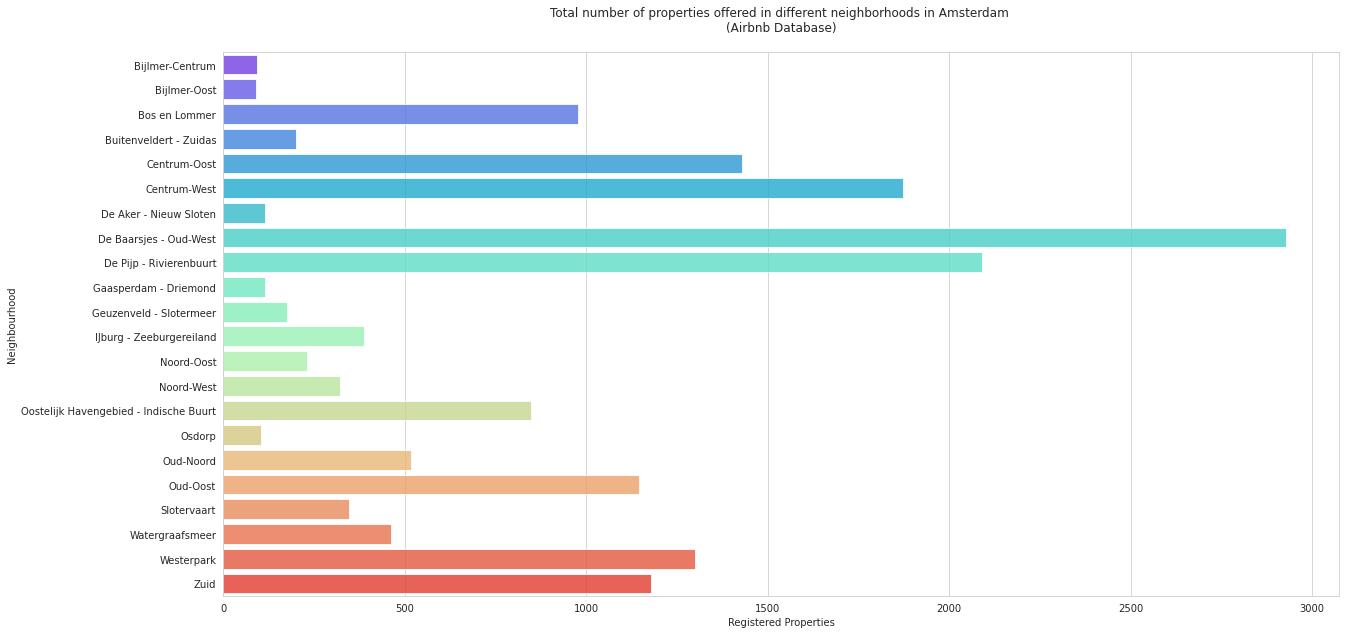

In [36]:
sns.set_style('whitegrid')

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
ax = sns.barplot(y=df_neighbourhood.Neighbourhood, x=df_neighbourhood.Registered_Properties, palette='rainbow', alpha=0.8)
plt.title('Total number of properties offered in different neighborhoods in Amsterdam \n(Airbnb Database)\n')
ax.set(xlabel='Registered Properties',ylabel='Neighbourhood')
plt.show()

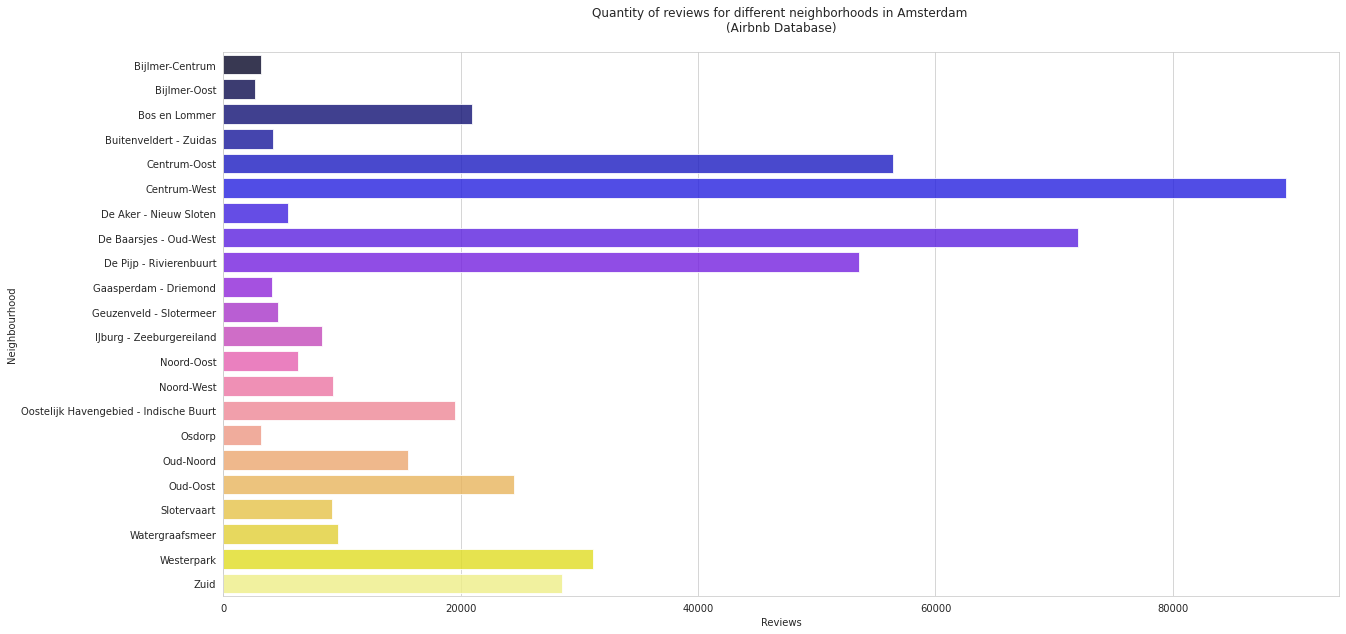

In [37]:
sns.set_style('whitegrid')

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
ax = sns.barplot(y=df_neighbourhood.Neighbourhood, x=df_neighbourhood.Total_Reviews, palette='gnuplot2', alpha=0.8)
plt.title('Quantity of reviews for different neighborhoods in Amsterdam \n(Airbnb Database)\n')
ax.set(xlabel='Reviews',ylabel='Neighbourhood')
plt.show()

In [39]:
# The 03 Most Popular Neighborhoods in Amsterdam (criteria: total of reviews)
print('-='*30)
print('\t\t| Top 3 Neighbourhoods |\t\t\t\n')
for x in df_neighbourhood.Total_Reviews.nlargest(3).index:
  print(df_neighbourhood.Neighbourhood[x], '// Total of Reviews: ',df_neighbourhood.Total_Reviews[x])
print('-='*30)

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
		| Top 3 Neighbourhoods |			

Centrum-West // Total of Reviews:  89531
De Baarsjes - Oud-West // Total of Reviews:  72002
Centrum-Oost // Total of Reviews:  56446
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


> **Conclusion:** 
>> So from the plot it turned out that the neighbourhoods like 'Centrum-West', 'De Baarsjes - Oud-West' and 'Centrum-Oost' are the most popular neighbourhoods for Airbnb accomodations in Amsterdam because these neighbourhoods have the highest number of reviews.
Here I'd like to mention that we could have taken into consideration the reviews themselves to better understand if the guests liked the accomodation or not but that requires techniques like NLP (Natural Language Processing), but since We want to use only prediction model using basic regression techniques this is not relevant at this moment

## Question 2

> What is the average price/night for Airbnb in Amsterdam?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

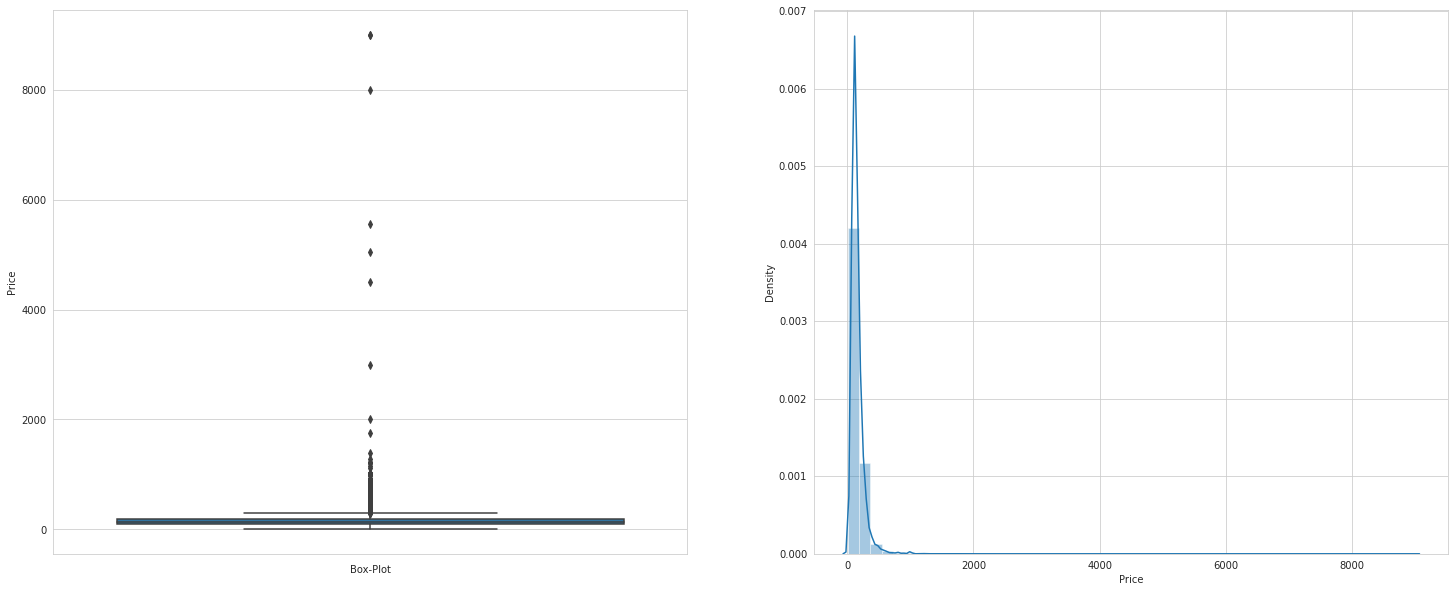

In [55]:
fig = plt.figure(figsize = (25,10))

fig.add_subplot(1,2,1)
sns.boxplot(y=df2.price)
plt.xlabel('Box-Plot')
plt.ylabel('Price')

fig.add_subplot(1,2,2)
sns.distplot(df2.price)
plt.xlabel('Price')
plt.ylabel('Density')

In [56]:
#Checking no. of different type of rooms types in Airbnb Amsterdam
df2.room_type.value_counts()

Entire home/apt    13243
Private room        3416
Hotel room           222
Shared room           45
Name: room_type, dtype: int64

In [57]:
df2.groupby(by = 'room_type')['price'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
room_type,,,,,,,,,,,,
Entire home/apt,13243.0,169.507966,141.640834,5.0,61.00,90.0,110.00,146.0,199.00,275.0,550.00,8000.0
Hotel room,222.0,245.490991,220.477059,20.0,20.00,80.5,121.25,189.0,268.25,500.0,1000.00,1285.0
Private room,3416.0,109.329625,228.741003,10.0,32.00,50.0,69.00,88.0,120.00,160.0,379.25,9000.0
Shared room,45.0,188.000000,279.898521,17.0,22.72,41.6,50.00,75.0,152.00,498.0,1000.00,1000.0


In [58]:
#Code to print the row with max price (print entire row at that index number)
print(df2.loc[df2['price'].idxmax()])

id                                                             286500
name                              Center,Canal View, Private Bathroom
host_id                                                       1491565
host_name                                                       David
neighbourhood                                            Centrum-West
latitude                                                      52.3756
longitude                                                         4.9
room_type                                                Private room
price                                                            9000
minimum_nights                                                      3
number_of_reviews                                                 275
last_review                                       2020-03-06 00:00:00
reviews_per_month                                                 2.7
calculated_host_listings_count                                      2
availability_365    

In [59]:
#printing the Median values 
df2.groupby('room_type').price.median().sort_values(ascending=False)

room_type
Hotel room         189
Entire home/apt    146
Private room        88
Shared room         75
Name: price, dtype: int64

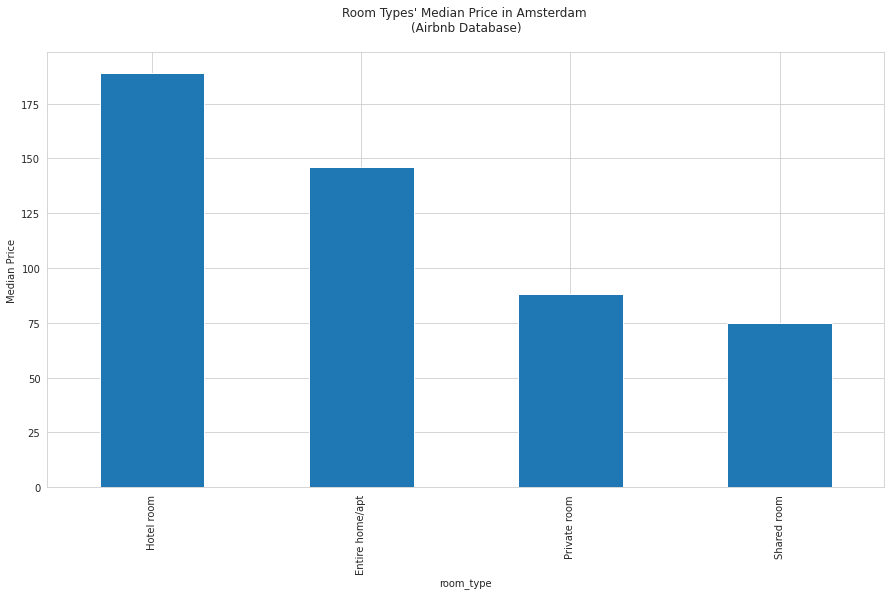

In [60]:
# This plot shows the median price of room type of Airbnb in Amsterdam
df2.groupby('room_type').price.median().sort_values(ascending=False).plot(kind='bar',figsize=(15,8),ylabel='Median Price',
                                                                          title='Room Types\' Median Price in Amsterdam \n(Airbnb Database)\n')

In [61]:
#printing the Mean values 
df2.groupby('room_type').price.mean().sort_values(ascending=False)

room_type
Hotel room         245.490991
Shared room        188.000000
Entire home/apt    169.507966
Private room       109.329625
Name: price, dtype: float64

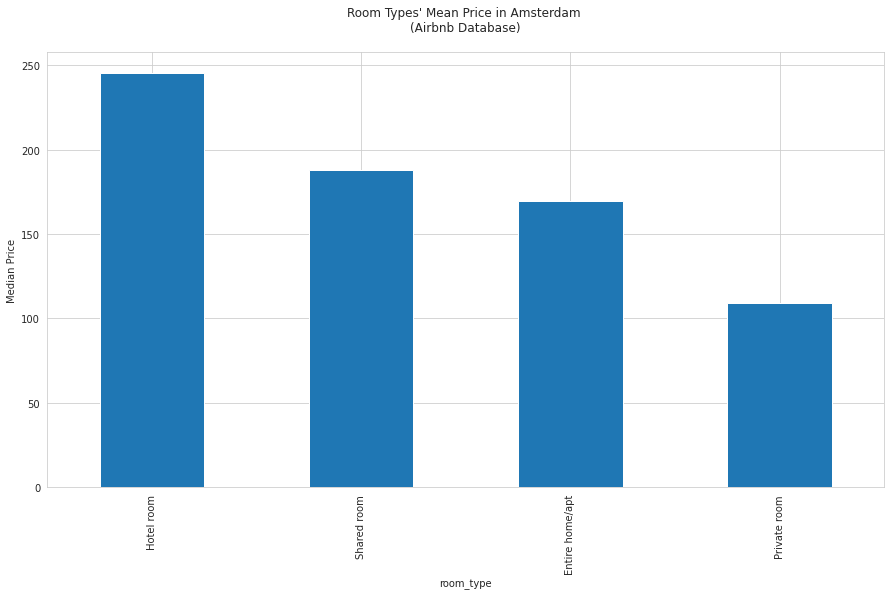

In [62]:
# This plot shows the median price of room type of Airbnb in Amsterdam
df2.groupby('room_type').price.mean().sort_values(ascending=False).plot(kind='bar',figsize=(15,8),ylabel='Median Price',
                                                                          title='Room Types\' Mean Price in Amsterdam \n(Airbnb Database)\n')

> **Conclusion:** 
>> So from the above comparison we can see that Mean and Median can have different effects on the overall values. Sometimes taking the mean of all the values to represent the average might be a good idea and sometimes taking Median is a better approach. From this example, we saw that when we take the Mean of all the price values of room_type 'Shared room', it shows a very high number because there there will be Shared rooms which costs alot more per night. These kinds of values are outliers and they disturb the overall outcome and that is why we saw a very high mean value. On the other hand taking Median proved to be a better approach because it sorts all the values in the ascending manner and takes the middle value, which in this case, is a better representation of the average price. So to conclude, we can say that based on the scenario, we have to decide what is a better aproach to represent the average.

## Question 3

> What factors influence the price of Airbnb accommodation in Amsterdam?

Correlation of features

In order to prepare the data for our model, it's interesting to plot a correlation graph to see how different Features are correlated to each other. Often a useful plot is a correlation matrix - this can tell you which variables are related to one another.

In [79]:
df2.drop(['id','host_id'], axis = 1).corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,-0.149765,0.019465,-0.014993,0.032925,0.031735,0.014589,0.034211
longitude,-0.149765,1.000000,0.012660,0.000699,0.002811,0.011654,0.009569,0.026967
price,0.019465,0.012660,1.000000,0.037770,-0.023603,-0.011993,0.045281,0.136258
minimum_nights,-0.014993,0.000699,0.037770,1.000000,-0.018597,-0.032477,-0.007774,0.056123
number_of_reviews,0.032925,0.002811,-0.023603,-0.018597,1.000000,0.781180,-0.005990,0.319306
reviews_per_month,0.031735,0.011654,-0.011993,-0.032477,0.781180,1.000000,0.014701,0.320242
calculated_host_listings_count,0.014589,0.009569,0.045281,-0.007774,-0.005990,0.014701,1.000000,0.045631
availability_365,0.034211,0.026967,0.136258,0.056123,0.319306,0.320242,0.045631,1.000000


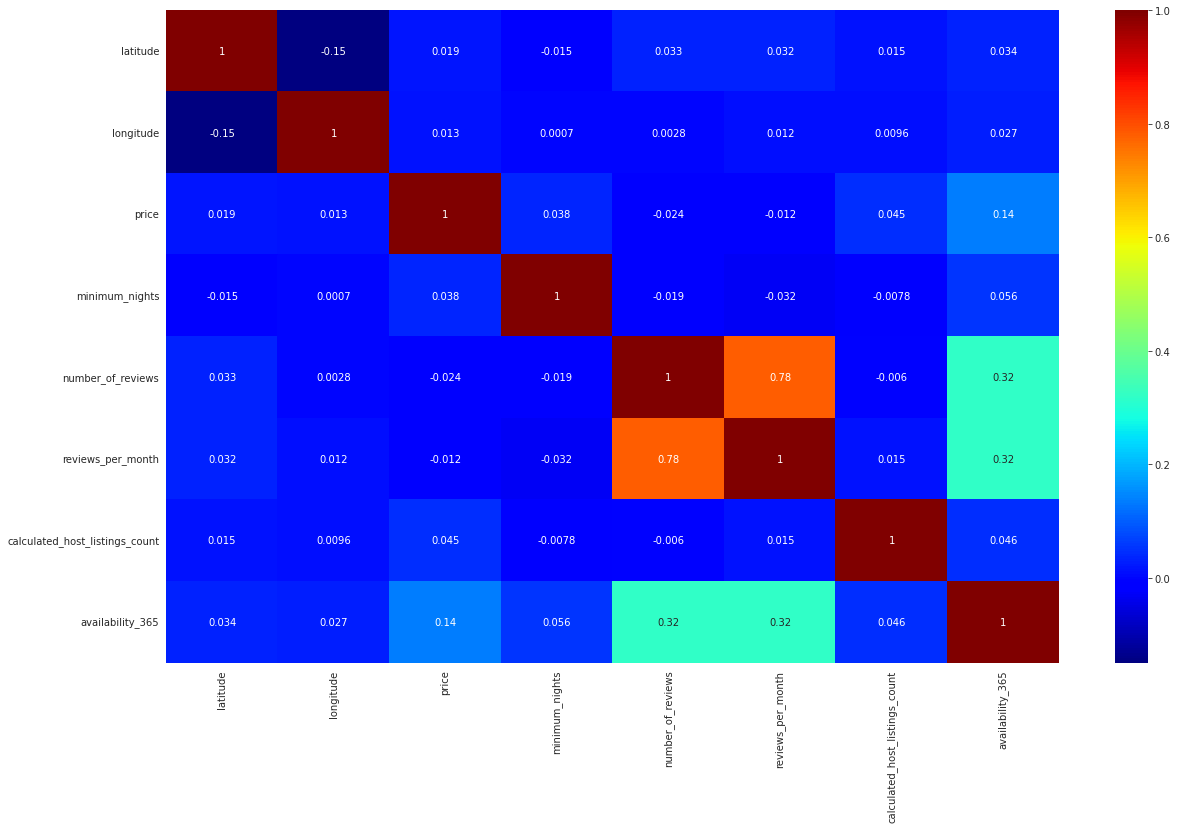

In [89]:
plt.figure(figsize=(20,12))
sns.heatmap(df2.drop(['id','host_id'], axis = 1).corr(), annot=True, cmap='jet')

<Figure size 1440x864 with 0 Axes>

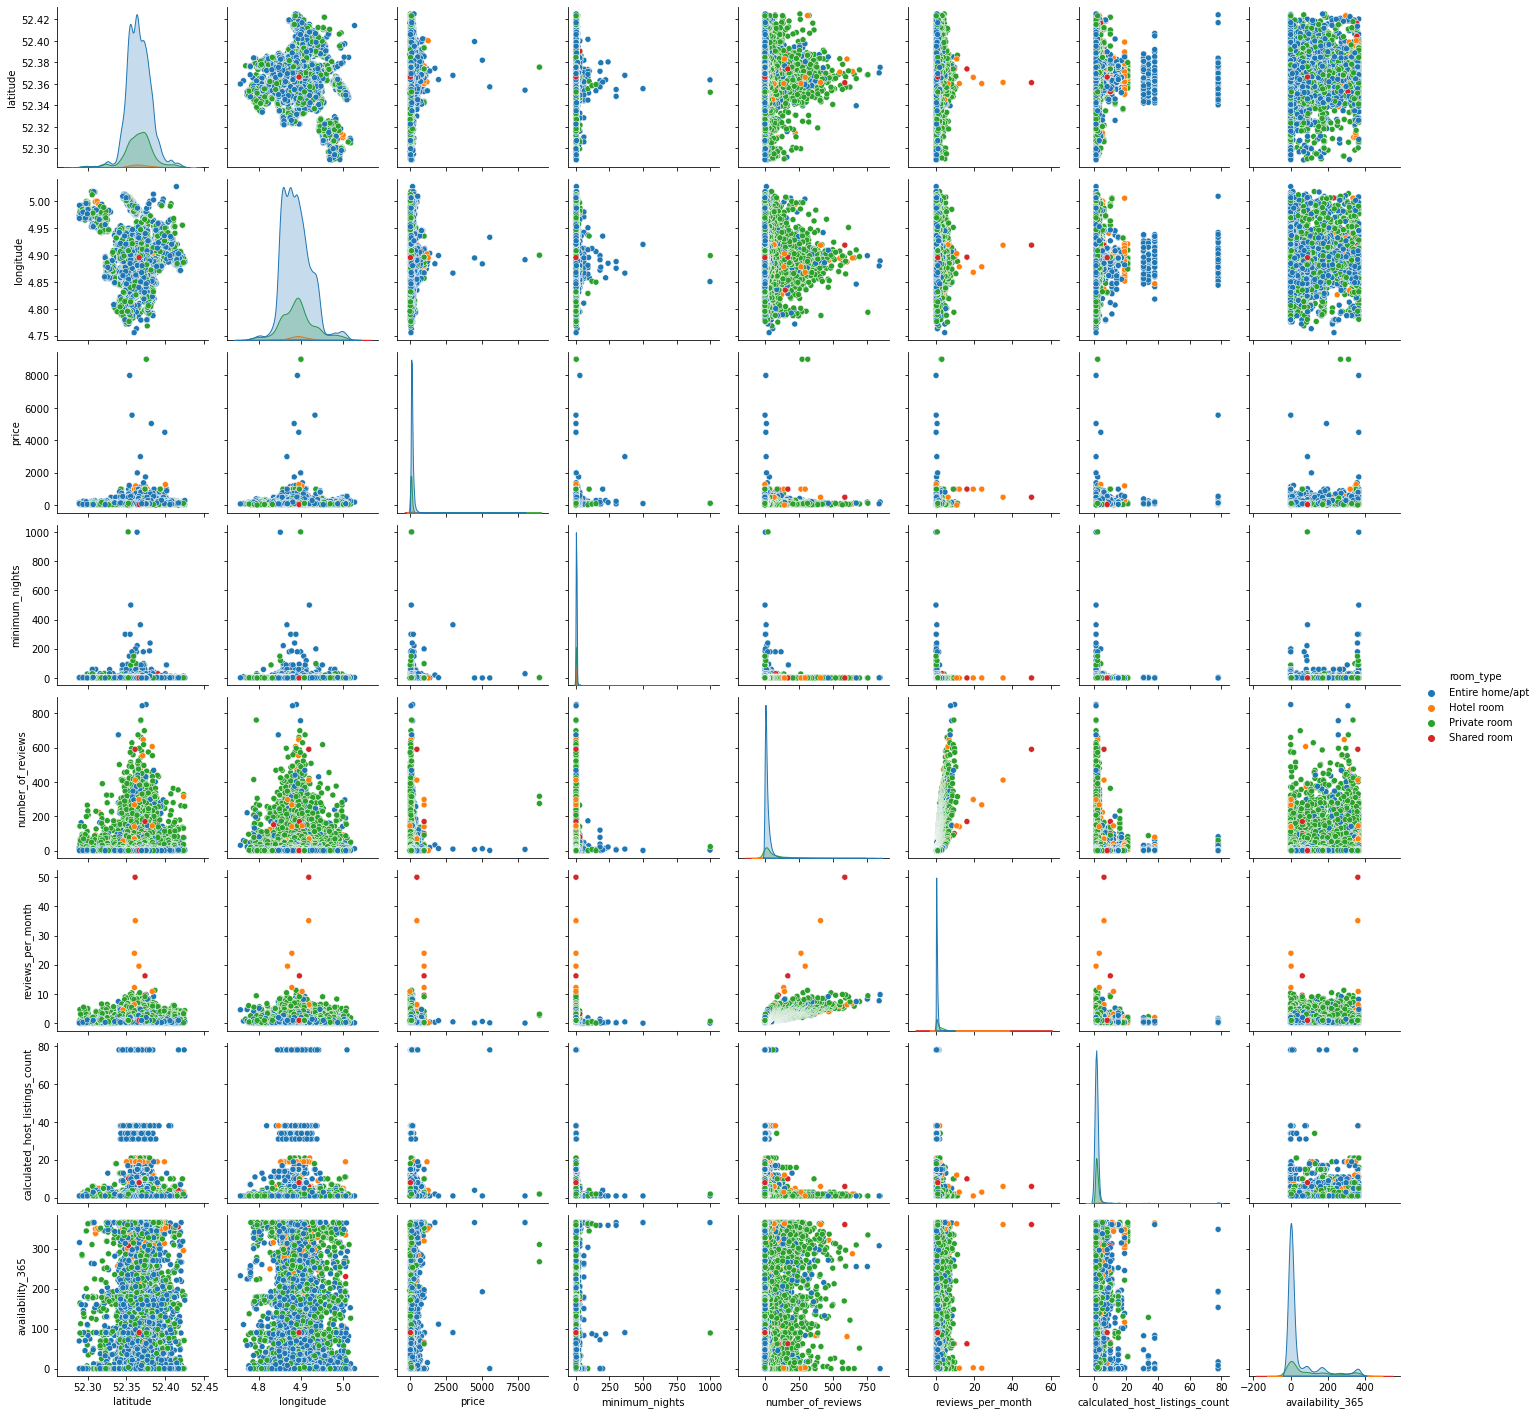

In [ ]:
plt.figure(figsize=(20,12))
sns.pairplot(df2.drop(['id','host_id'], axis = 1), hue='room_type')

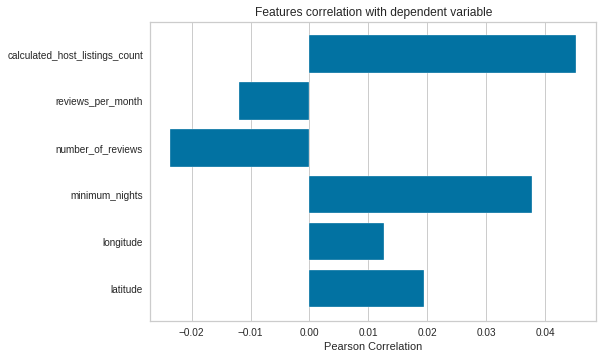

In [90]:
from yellowbrick.target import FeatureCorrelation

#Visualizador de correlacao com o target
features = list(df2[['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count']])
visualizer = FeatureCorrelation(labels=features)
visualizer.fit(df2[['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count']], df2.price)        
visualizer.show()           

> **Conclusion:** 
>> After observing the previous plots, it is clear that the Features are mostly independant of each other (wich is good because it probably won't be observed multicollinearity problems between X variables). Some Features that are more correlated to each other are, for example, 'availability_365', 'number_of_reviews' and 'reviews_per_month'

# 3- Regression Methods for Price Prediction

## Creating a copy from the Pre-Treated DF

In [91]:
df3 = df2.copy()
df3.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.04,1,158
1,9693,Top Location on Canal (Center Flat),32366,Sabine And Sander,Centrum-West,52.37802,4.89270,Entire home/apt,119,3,55,2018-06-29,0.44,1,17
2,20168,Studio with private bathroom in the centre 1,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.72,2,31
3,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.17,1,212
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.38761,4.89188,Private room,135,2,217,2020-03-02,2.12,1,235


In [92]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16926 entries, 0 to 19272
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              16926 non-null  int64         
 1   name                            16926 non-null  string        
 2   host_id                         16926 non-null  int64         
 3   host_name                       16926 non-null  string        
 4   neighbourhood                   16926 non-null  category      
 5   latitude                        16926 non-null  float64       
 6   longitude                       16926 non-null  float64       
 7   room_type                       16926 non-null  category      
 8   price                           16926 non-null  int64         
 9   minimum_nights                  16926 non-null  int64         
 10  number_of_reviews               16926 non-null  int64         
 11  la

## Slicing original data into Numerical and Categorical DFs

### Numerical Features

In [93]:
dfNum = df3.select_dtypes(include='number').drop(['price'], axis = 1)
dfNum.head()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,3159,52.36575,4.94142,3,278,2.04,1,158
1,9693,32366,52.37802,4.89270,3,55,0.44,1,17
2,20168,59484,52.36509,4.89354,1,340,2.72,2,31
3,25428,56142,52.37297,4.88339,14,5,0.17,1,212
4,27886,97647,52.38761,4.89188,2,217,2.12,1,235


> Scalling

For continuous variables, the transformation used will be the 'Scaling' method (or normalization). To facilitate the application of this operation, a function will be created.

In [94]:
def feat_scale(X):

  # Calculates the mean of all the variables
  mu = np.mean(X, axis = 0)

  # Calculates the std of all the variables
  sigma = np.std(X, axis = 0, ddof = 1)

  # Applies the normalization
  xNorm = (X-mu)/sigma

  return xNorm, mu, sigma

In [113]:
xNorm, mu, sigma = feat_scale(dfNum.drop(['id','host_id'], axis=1))

print('Scalled DF: \n', xNorm.head(),'\n\n')
print('Mean Value per Feature (Original DF): \n', mu,'\n\n')
print('STD per Feature (Original DF): \n', sigma)

Scalled DF: 
    latitude  longitude  ...  calculated_host_listings_count  availability_365
0  0.016965   1.453104  ...                       -0.174338          0.911387
1  0.767120   0.085889  ...                       -0.174338         -0.410479
2 -0.023386   0.109461  ...                        0.000734         -0.279230
3  0.458376  -0.175375  ...                       -0.174338          1.417634
4  1.353427   0.062877  ...                       -0.174338          1.633258

[5 rows x 7 columns] 


Mean Value per Feature (Original DF): 
 latitude                          52.365473
longitude                          4.889639
minimum_nights                     3.371145
number_of_reviews                 28.465024
reviews_per_month                  0.745598
calculated_host_listings_count     1.995805
availability_365                  60.784710
dtype: float64 


STD per Feature (Original DF): 
 latitude                            0.016357
longitude                           0.035634
mini

### Categorical Features

In [114]:
dfCat = df3.select_dtypes(include='category')
dfCat.head()

,neighbourhood,room_type
0,Oostelijk Havengebied - Indische Buurt,Private room
1,Centrum-West,Entire home/apt
2,Centrum-Oost,Private room
3,Centrum-West,Entire home/apt
4,Centrum-West,Private room


> Dumming

In [115]:
dfCat_Dummed = pd.get_dummies(dfCat)
dfCat_Dummed.head()

,neighbourhood_Bijlmer-Centrum,neighbourhood_Bijlmer-Oost,neighbourhood_Bos en Lommer,neighbourhood_Buitenveldert - Zuidas,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Aker - Nieuw Sloten,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,neighbourhood_Gaasperdam - Driemond,neighbourhood_Geuzenveld - Slotermeer,neighbourhood_IJburg - Zeeburgereiland,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Summaryzing all the Variables (X, y) and creating a Final DF for the Model

####  X Variables

In [183]:
X = pd.concat([xNorm, dfCat_Dummed], axis = 1)
X = pd.DataFrame(X)
X

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Bijlmer-Centrum,neighbourhood_Bijlmer-Oost,neighbourhood_Bos en Lommer,neighbourhood_Buitenveldert - Zuidas,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Aker - Nieuw Sloten,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,neighbourhood_Gaasperdam - Driemond,neighbourhood_Geuzenveld - Slotermeer,neighbourhood_IJburg - Zeeburgereiland,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.016965,1.453104,-0.026990,4.398930,1.063668,-0.174338,0.911387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0.767120,0.085889,-0.026990,0.467772,-0.251123,-0.174338,-0.410479,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.023386,0.109461,-0.172432,5.491898,1.622455,0.000734,-0.279230,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.458376,-0.175375,0.772939,-0.413653,-0.472995,-0.174338,1.417634,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1.353427,0.062877,-0.099711,3.323591,1.129408,-0.174338,1.633258,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19241,0.606940,-1.205277,-0.172432,-0.466539,1.030798,-0.174338,0.020768,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19251,0.056093,0.165025,-0.172432,-0.484167,0.209054,1.051166,0.273892,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19255,0.249898,-0.614276,-0.172432,-0.484167,0.209054,-0.174338,-0.494853,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19266,-0.859133,-2.635634,-0.172432,-0.484167,0.209054,-0.174338,2.795750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


#### System Response (y)

In [117]:
y = df3.price
y.head()

0     59
1    119
2    100
3    125
4    135
Name: price, dtype: int64

---
> Kolmogorov Tests
---

>> * Original data

In [118]:
# Kolmogorov Test
kStat, kPvalue = sp.stats.kstest(rvs=y, cdf='norm') #cdf: cumulative distribution function ; <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

print(f'Statistics: {kStat}\nP-Value: {kPvalue}')

Statistics: 0.9999997133484281
P-Value: 0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


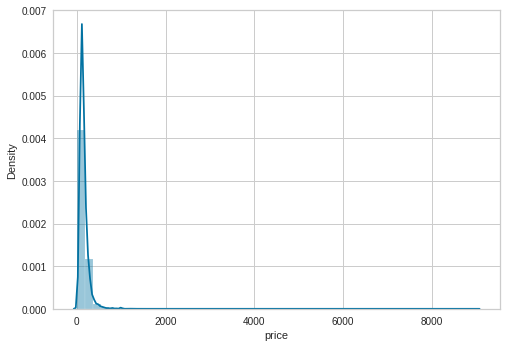

In [119]:
fig = plt.figure()
sns.distplot(y)

>> * Log(y)

In [120]:
# Kolmogorov Test for Log(y)
kStat, kPvalue = sp.stats.kstest(rvs=np.log(y), cdf='norm') #cdf: cumulative distribution function ; <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

print(f'Statistics: {kStat}\nP-Value: {kPvalue}')

Statistics: 0.99827658228669
P-Value: 0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


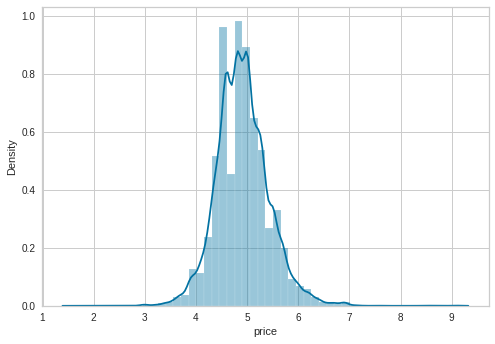

In [121]:
fig = plt.figure()
sns.distplot(np.log(y))

>> * Inverse (1/y)

In [122]:
# Kolmogorov Test for 1/y
kStat, kPvalue = sp.stats.kstest(rvs=1/y, cdf='norm') #cdf: cumulative distribution function ; <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

print(f'Statistics: {kStat}\nP-Value: {kPvalue}')

Statistics: 0.5000443269199534
P-Value: 0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


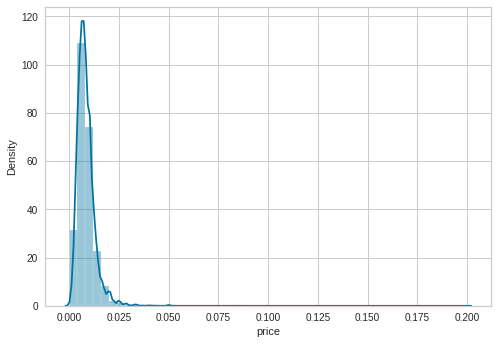

In [123]:
fig = plt.figure()
sns.distplot(1/y)

>> * Box-Cox Transformation

In [124]:
posdata = y[y > 0] # Find the optimal Box-Cox transformation, and verify that λ is positive. This work-around doesn't work if λ ≤ 0.

yBx = sp.stats.boxcox(posdata.values, alpha = 0.01) # alpha = 0.01 for 99% of confidence

print('Optimal Box-Cox Transformation: ', yBx[1])
print('Confidence Interval (99%): ', yBx[2])

Optimal Box-Cox Transformation:  -0.17130908147176713
Confidence Interval (99%):  (-0.1956661310192304, -0.14699983812236006)


In [125]:
# Kolmogorov Test for Box-Cox result
kStat, kPvalue = sp.stats.kstest(rvs=y ** yBx[1], cdf='norm') #cdf: cumulative distribution function ; <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

print(f'Statistics: {kStat}\nP-Value: {kPvalue}')

Statistics: 0.6241120158490457
P-Value: 0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


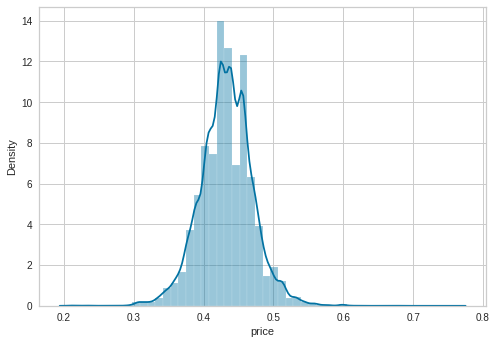

In [126]:
fig = plt.figure()
sns.distplot(y ** yBx[1])

We're gonna choose the log(y) transformation because it seems more 'normally' distributed and has a better Kolmogorov result when compared to Box-Cox transformation

In [127]:
y_log = np.log(y)
y_log.head()

0    4.077537
1    4.779123
2    4.605170
3    4.828314
4    4.905275
Name: price, dtype: float64

In [128]:
dfFinal = pd.concat([y_log, X], axis = 1) #join y with xNorm
dfFinal

,price,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Bijlmer-Centrum,neighbourhood_Bijlmer-Oost,neighbourhood_Bos en Lommer,neighbourhood_Buitenveldert - Zuidas,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Aker - Nieuw Sloten,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,neighbourhood_Gaasperdam - Driemond,neighbourhood_Geuzenveld - Slotermeer,neighbourhood_IJburg - Zeeburgereiland,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,4.077537,0.016965,1.453104,-0.026990,4.398930,1.063668,-0.174338,0.911387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,4.779123,0.767120,0.085889,-0.026990,0.467772,-0.251123,-0.174338,-0.410479,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,4.605170,-0.023386,0.109461,-0.172432,5.491898,1.622455,0.000734,-0.279230,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4.828314,0.458376,-0.175375,0.772939,-0.413653,-0.472995,-0.174338,1.417634,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4.905275,1.353427,0.062877,-0.099711,3.323591,1.129408,-0.174338,1.633258,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19241,4.532599,0.606940,-1.205277,-0.172432,-0.466539,1.030798,-0.174338,0.020768,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19251,3.912023,0.056093,0.165025,-0.172432,-0.484167,0.209054,1.051166,0.273892,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19255,4.605170,0.249898,-0.614276,-0.172432,-0.484167,0.209054,-0.174338,-0.494853,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19266,2.995732,-0.859133,-2.635634,-0.172432,-0.484167,0.209054,-0.174338,2.795750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [129]:
# After OLS Formula we need to change the Dummed categories (any space between characters will be an invalid syntax)

# from google.colab import files
# dfFinal.to_csv('dfFinal.csv')
# files.download('dfFinal.csv')

In [209]:
dfFinal = pd.read_csv('dfFinal.csv')
dfFinal = dfFinal.drop(['index','id','host_id'], axis=1)
dfFinal.head()

,price,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Bijlmer_Centrum,neighbourhood_Bijlmer_Oost,neighbourhood_Bos_en_Lommer,neighbourhood_Buitenveldert_Zuidas,neighbourhood_Centrum_Oost,neighbourhood_Centrum_West,neighbourhood_De_Aker_Nieuw_Sloten,neighbourhood_De_Baarsjes_Oud_West,neighbourhood_De_Pijp_Rivierenbuurt,neighbourhood_Gaasperdam_Driemond,neighbourhood_Geuzenveld_Slotermeer,neighbourhood_IJburg_Zeeburgereiland,neighbourhood_Noord_Oost,neighbourhood_Noord_West,neighbourhood_Oostelijk_Havengebied_Indische_Buurt,neighbourhood_Osdorp,neighbourhood_Oud_Noord,neighbourhood_Oud_Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room
0,4.077537,0.016965,1.453104,-0.026990,4.398930,1.063668,-0.174338,0.911387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,4.779123,0.767120,0.085889,-0.026990,0.467772,-0.251123,-0.174338,-0.410479,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,4.605170,-0.023386,0.109461,-0.172432,5.491898,1.622455,0.000734,-0.279230,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4.828314,0.458376,-0.175375,0.772939,-0.413653,-0.472995,-0.174338,1.417634,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4.905275,1.353427,0.062877,-0.099711,3.323591,1.129408,-0.174338,1.633258,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [187]:
dfFinal.shape

(16926, 34)

### OLS Formula (Patsy) for Regression Models --> Least Squares Method or Gradient-Descent

> For formula construction using Patsy, the entire model must be explicitly specified. For small models, this activity is not a problem. However, for very large models this activity can be tedious and even error prone. Thus, it is suggested to build a function to "assemble" the formula

In [210]:
def ols_formula(df, dependent_var, *excluded_cols):

  # Lists the Features names
  df_columns = list(df.columns.values)

  # Remove all dependent variables
  df_columns.remove(dependent_var)

  # Remove excluded columns (if exists)
  for col in excluded_cols:
    df_columns.remove(col)
  
  return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [211]:
ols_formula(dfFinal, 'price')

'price ~ latitude + longitude + minimum_nights + number_of_reviews + reviews_per_month + calculated_host_listings_count + availability_365 + neighbourhood_Bijlmer_Centrum + neighbourhood_Bijlmer_Oost + neighbourhood_Bos_en_Lommer + neighbourhood_Buitenveldert_Zuidas + neighbourhood_Centrum_Oost + neighbourhood_Centrum_West + neighbourhood_De_Aker_Nieuw_Sloten + neighbourhood_De_Baarsjes_Oud_West + neighbourhood_De_Pijp_Rivierenbuurt + neighbourhood_Gaasperdam_Driemond + neighbourhood_Geuzenveld_Slotermeer + neighbourhood_IJburg_Zeeburgereiland + neighbourhood_Noord_Oost + neighbourhood_Noord_West + neighbourhood_Oostelijk_Havengebied_Indische_Buurt + neighbourhood_Osdorp + neighbourhood_Oud_Noord + neighbourhood_Oud_Oost + neighbourhood_Slotervaart + neighbourhood_Watergraafsmeer + neighbourhood_Westerpark + neighbourhood_Zuid + room_type_Entire_home_apt + room_type_Hotel_room + room_type_Private_room + room_type_Shared_room'

In [212]:
y, X =  pt.dmatrices(ols_formula(dfFinal, 'price'), data = dfFinal, return_type = 'dataframe')

print(y.head(),'\n\n','-'*30,'\n\n',X.head())

      price
0  4.077537
1  4.779123
2  4.605170
3  4.828314
4  4.905275 

 ------------------------------ 

    Intercept  latitude  ...  room_type_Private_room  room_type_Shared_room
0        1.0  0.016965  ...                     1.0                    0.0
1        1.0  0.767120  ...                     0.0                    0.0
2        1.0 -0.023386  ...                     1.0                    0.0
3        1.0  0.458376  ...                     0.0                    0.0
4        1.0  1.353427  ...                     1.0                    0.0

[5 rows x 34 columns]


#### Slicing data into train and test

In [213]:
def split_train_test(X, y, perc = 0.2):
  """
  X: x's variables
  y: target variable (system response)
  perc: test data percentage (decimal value; default = 0.2 = 20% of data)
  """
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

  # Resets all DFs indexes
  X_train.reset_index(drop = True, inplace = True)
  X_test.reset_index(drop = True, inplace = True)
  y_train.reset_index(drop = True, inplace = True)
  y_test.reset_index(drop = True, inplace = True)

  return X_train, X_test, y_train, y_test

In [214]:
X_train, X_test, y_train, y_test = split_train_test(X, y, perc=0.2)

#### Least Squares Method (LSM)

In [215]:
reg_lsm = sm.OLS(y_train, X_train) #especifies the model
reg_lsm = reg_lsm.fit() #adjusts the model
print(reg_lsm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:06:24   Log-Likelihood:                -7739.8
No. Observations:               13540   AIC:                         1.554e+04
Df Residuals:                   13508   BIC:                         1.578e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [216]:
# Variance of Inflation

pd.DataFrame({
            'variables': X_train.columns[1:],
            'VIF': [variance_inflation_factor(X_train.values, i+1) for i in range(len(X_train.columns[1:]))]
            })

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,latitude,1.110735e+01
1,longitude,1.541605e+01
2,minimum_nights,1.008416e+00
3,number_of_reviews,2.600653e+00
4,reviews_per_month,2.725733e+00
5,calculated_host_listings_count,1.015681e+00
6,availability_365,1.217182e+00
7,neighbourhood_Bijlmer_Centrum,8.229495e+09
8,neighbourhood_Bijlmer_Oost,1.874368e+10
9,neighbourhood_Bos_en_Lommer,2.636993e+09


As we can see, there is a strong problem with VIF factors and with the OLS eigenvalue (multicollinearity). By now we need to remove the variables with great standard errors and create a new X DF:

In [218]:
dfFinal.columns

Index(['price', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_Bijlmer_Centrum',
       'neighbourhood_Bijlmer_Oost', 'neighbourhood_Bos_en_Lommer',
       'neighbourhood_Buitenveldert_Zuidas', 'neighbourhood_Centrum_Oost',
       'neighbourhood_Centrum_West', 'neighbourhood_De_Aker_Nieuw_Sloten',
       'neighbourhood_De_Baarsjes_Oud_West',
       'neighbourhood_De_Pijp_Rivierenbuurt',
       'neighbourhood_Gaasperdam_Driemond',
       'neighbourhood_Geuzenveld_Slotermeer',
       'neighbourhood_IJburg_Zeeburgereiland', 'neighbourhood_Noord_Oost',
       'neighbourhood_Noord_West',
       'neighbourhood_Oostelijk_Havengebied_Indische_Buurt',
       'neighbourhood_Osdorp', 'neighbourhood_Oud_Noord',
       'neighbourhood_Oud_Oost', 'neighbourhood_Slotervaart',
       'neighbourhood_Watergraafsmeer', 'neighbourhood_Westerpark',
       'neighbourhood_Zuid', 'room_type_

In [364]:
# Reducing original data:
dfFinal = pd.read_csv('dfFinal.csv')
dfFinal = dfFinal[['latitude','longitude','price','number_of_reviews','availability_365','room_type_Entire_home_apt','room_type_Hotel_room','room_type_Private_room','room_type_Shared_room']]
# dfFinal = dfFinal[['latitude','longitude','price','number_of_reviews','room_type_Entire_home_apt','room_type_Hotel_room','room_type_Private_room','room_type_Shared_room']]
dfFinal.head()

,latitude,longitude,price,number_of_reviews,availability_365,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room
0,0.016965,1.453104,4.077537,4.398930,0.911387,0,0,1,0
1,0.767120,0.085889,4.779123,0.467772,-0.410479,1,0,0,0
2,-0.023386,0.109461,4.605170,5.491898,-0.279230,0,0,1,0
3,0.458376,-0.175375,4.828314,-0.413653,1.417634,1,0,0,0
4,1.353427,0.062877,4.905275,3.323591,1.633258,0,0,1,0


> OLS Formula (Reshaped)

In [365]:
ols_formula(dfFinal, 'price')

'price ~ latitude + longitude + number_of_reviews + availability_365 + room_type_Entire_home_apt + room_type_Hotel_room + room_type_Private_room + room_type_Shared_room'

In [366]:
y, X =  pt.dmatrices(ols_formula(dfFinal, 'price'), data = dfFinal, return_type = 'dataframe')

print(y.head(),'\n\n','-'*30,'\n\n',X.head())

      price
0  4.077537
1  4.779123
2  4.605170
3  4.828314
4  4.905275 

 ------------------------------ 

    Intercept  latitude  ...  room_type_Private_room  room_type_Shared_room
0        1.0  0.016965  ...                     1.0                    0.0
1        1.0  0.767120  ...                     0.0                    0.0
2        1.0 -0.023386  ...                     1.0                    0.0
3        1.0  0.458376  ...                     0.0                    0.0
4        1.0  1.353427  ...                     1.0                    0.0

[5 rows x 9 columns]


> Regression

In [367]:
X_train, X_test, y_train, y_test = split_train_test(X, y, perc=0.2)

In [368]:
reg_lsm = sm.OLS(y_train, X_train) #especifies the model
reg_lsm = reg_lsm.fit() #adjusts the model
print(reg_lsm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     537.9
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:55:44   Log-Likelihood:                -8411.6
No. Observations:               13540   AIC:                         1.684e+04
Df Residuals:                   13532   BIC:                         1.690e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [369]:
# Variance of Inflation

pd.DataFrame({
            'variables': X_train.columns[1:],
            'VIF': [variance_inflation_factor(X_train.values, i+1) for i in range(len(X_train.columns[1:]))]
            })

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,latitude,1.025756
1,longitude,1.027018
2,number_of_reviews,1.225118
3,availability_365,1.183420
4,room_type_Entire_home_apt,inf
5,room_type_Hotel_room,inf
6,room_type_Private_room,inf
7,room_type_Shared_room,inf


> Prediction DF

In [370]:
predDF_LSM = pd.concat([y_test, reg_lsm.predict(X_test)], axis = 1)
predDF_LSM.columns = ['price_real', 'price_pred']
predDF_LSM['residuals'] = predDF_LSM.price_real - predDF_LSM.price_pred

predDF_LSM

,price_real,price_pred,residuals
0,5.298317,5.248535,0.049782
1,5.164786,4.956543,0.208243
2,5.883322,4.921997,0.961325
3,5.521461,4.939575,0.581886
4,5.298317,4.958862,0.339455
...,...,...,...
3381,5.192957,4.969604,0.223352
3382,5.298317,4.985107,0.313210
3383,3.912023,4.425659,-0.513636
3384,5.521461,5.275513,0.245948


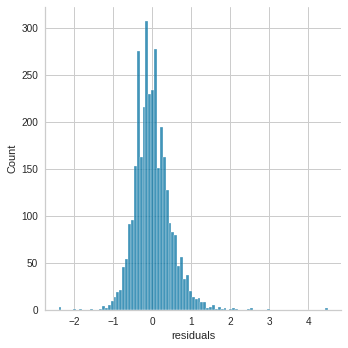

In [396]:
# Residuals Distribution
sns.displot(predDF_LSM.residuals)

In [371]:
print('R²:', metrics.r2_score(predDF_LSM['price_real'], predDF_LSM['price_pred']))
print('Root Mean Square Error (RMSE):', np.sqrt(metrics.mean_squared_error(predDF_LSM['price_real'], predDF_LSM['price_pred'])))

R²: 0.20677556919000417
Root Mean Square Error (RMSE): 0.46826823330955125


> Homocedasticity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Residuals for Price')

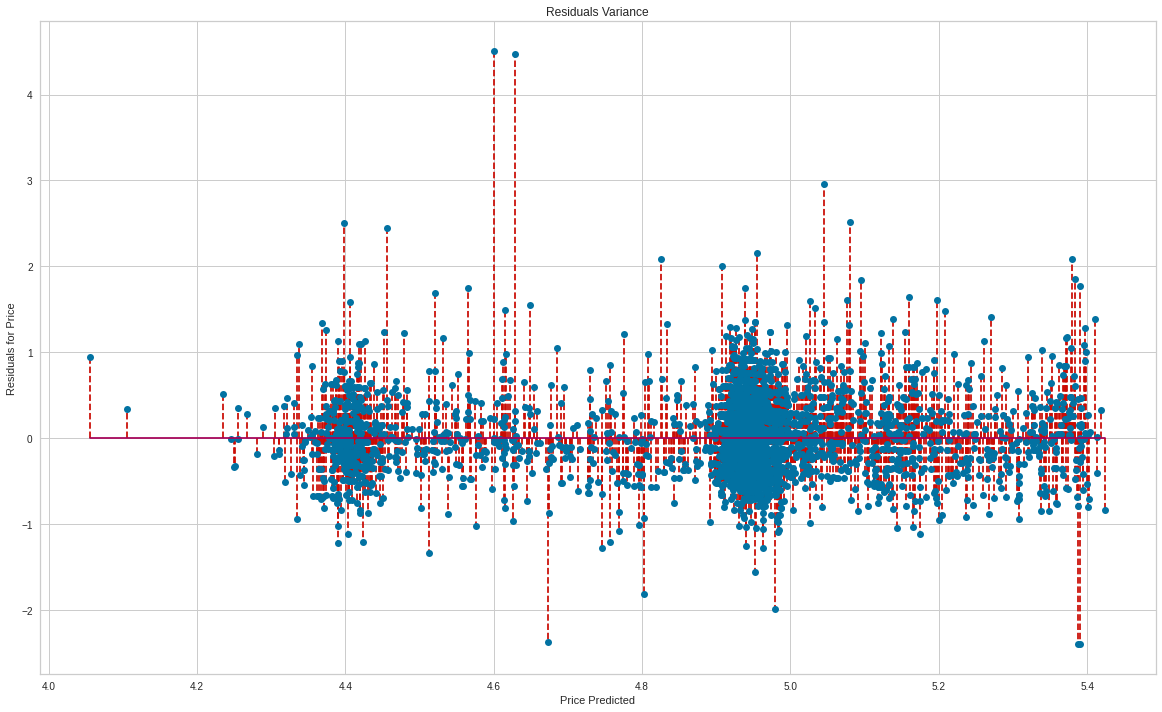

In [372]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,1,1)
plt.stem(predDF_LSM.price_pred, predDF_LSM.residuals,'--r')
ax.set_title('Residuals Variance')
ax.set_xlabel('Price Predicted')
ax.set_ylabel('Residuals for Price')

Since we don't see an essencial divergent behavior for the residuals variance, our prediction can be defined as homocedastical

#### Gradient-Descent

> Loss-Function

In [373]:
def loss_function(X, y, beta):

  """
  X: matrix of regressors (m x n).
  y: response series (1 x m).
  beta: parameters series (1 x n).
  """

  # Calculates predictions with current parameter values
  pred = X.dot(beta)

  # Calcutates the prediction errors
  res = np.subtract(pred, y.squeeze())

  # Calculates the square of errors
  sqrRes = np.square(res)

  # Calculate the loss value
  loss_val = 1/(2*m) * np.sum(sqrRes)

  return loss_val

> Gradient-Descent Function

In [374]:
def grad_des(X, y, beta, alpha, iter):

  """
  X: matrix of regressors (m x n).
  y: response series (1 x m).
  beta: parameters series (1 x n).
  alpha learning rate (escalar).
  iter: number of iterations

  __________________________________________
  Results:

  beta: final values calculated for the parameters
  h_loss: loss history
  """

  # Inicializa a série do histórico de perdas
  h_loss = np.zeros(iter)

  for i in range(iter):

    # Calculates predictions with current parameter values
    pred = X.dot(beta)

    # Calculates the prediction residuals
    res = np.subtract(pred, y.squeeze())

    # Calculates the increment / decrement in the value of betas - partial derivative of the loss function

    sumDelta = (alpha / m) * X.transpose().dot(res)

    # Updates the beta values
    beta = beta - sumDelta

    # Calculates the new loss value using the updated betas
    h_loss[i] = funcao_perda(X, y, beta)

  return beta, h_loss, sumDelta


> Algorithm Setup

In [375]:
# Reducing original data:
dfFinal = pd.read_csv('dfFinal.csv')
dfFinal = dfFinal[['latitude','longitude','price','number_of_reviews','availability_365','room_type_Entire_home_apt','room_type_Hotel_room','room_type_Private_room','room_type_Shared_room']]
dfFinal.head()

,latitude,longitude,price,number_of_reviews,availability_365,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room
0,0.016965,1.453104,4.077537,4.398930,0.911387,0,0,1,0
1,0.767120,0.085889,4.779123,0.467772,-0.410479,1,0,0,0
2,-0.023386,0.109461,4.605170,5.491898,-0.279230,0,0,1,0
3,0.458376,-0.175375,4.828314,-0.413653,1.417634,1,0,0,0
4,1.353427,0.062877,4.905275,3.323591,1.633258,0,0,1,0


In [376]:
ols_formula(dfFinal, 'price')

'price ~ latitude + longitude + number_of_reviews + availability_365 + room_type_Entire_home_apt + room_type_Hotel_room + room_type_Private_room + room_type_Shared_room'

In [377]:
y, X =  pt.dmatrices(ols_formula(dfFinal, 'price'), data = dfFinal, return_type = 'dataframe')

print(y.head(),'\n\n','-'*30,'\n\n',X.head())

      price
0  4.077537
1  4.779123
2  4.605170
3  4.828314
4  4.905275 

 ------------------------------ 

    Intercept  latitude  ...  room_type_Private_room  room_type_Shared_room
0        1.0  0.016965  ...                     1.0                    0.0
1        1.0  0.767120  ...                     0.0                    0.0
2        1.0 -0.023386  ...                     1.0                    0.0
3        1.0  0.458376  ...                     0.0                    0.0
4        1.0  1.353427  ...                     1.0                    0.0

[5 rows x 9 columns]


In [378]:
X_train, X_test, y_train, y_test = split_train_test(X, y, perc=0.2)

In [379]:
# Saves the DF shape with the regressors (including Intercept or beta_0)
m, n = X_train.shape

# Initialize the beta series
beta = np.zeros(n)

# Iterations
iter = 1000 #-> Obs: the number of iterations is by trial and error
             #        (if we change the value and there are no significant changes
             #        in the results, then the number of iterations has been consistently
             #        estimated; if we change and there is a big change, then it
             #        is an indication that we need to increase even more the estimated
             #        value for the number of iterations).

# Learning Rate
alpha = 0.1  #-> trial and error | small alphas: there may be convergence, but
             #   processing time will be very high; large alphas: small processing
             #   time, but there is a chance the values diverge

> Algorithm Application

In [380]:
beta, h_loss, sumDelta = grad_des(X = X_train, y = y_train, beta = beta, alpha = alpha, iter = iter)

In [381]:
print('\n\n','-'*30,'\n\tBeta:\n')
print(beta)

print('\n\n','-'*30,'\n\th_loss:\n')
print(h_loss.shape)
print(h_loss[0:50])

print('\n\n','-'*30,'\n\tsumDelta:\n')
print(sumDelta)



 ------------------------------ 
	Beta:

Intercept                    3.606134
latitude                     0.012553
longitude                    0.015475
number_of_reviews           -0.032193
availability_365             0.137752
room_type_Entire_home_apt    1.420556
room_type_Hotel_room         1.102663
room_type_Private_room       0.878078
room_type_Shared_room        0.204837
dtype: float64


 ------------------------------ 
	h_loss:

(1000,)
[8.49788192 5.94840597 4.18719404 2.96921147 2.12583861 1.5409829
 1.13467276 0.85178635 0.65430546 0.51598995 0.41871495 0.34995051
 0.30102648 0.26593744 0.240519   0.22187986 0.20800982 0.1975091
 0.18940127 0.18300386 0.17783876 0.17357015 0.16996139 0.16684512
 0.16410246 0.16164851 0.15942225 0.15737947 0.15548786 0.15372351
 0.15206854 0.15050932 0.14903531 0.1476382  0.1463113  0.1450491
 0.14384699 0.14270102 0.14160775 0.14056411 0.13956738 0.13861506
 0.13770485 0.13683465 0.13600247 0.13520646 0.1344449  0.13371613
 0.1330186  0.

> Convergence Analysis

(0.0, 8.497881915017482)

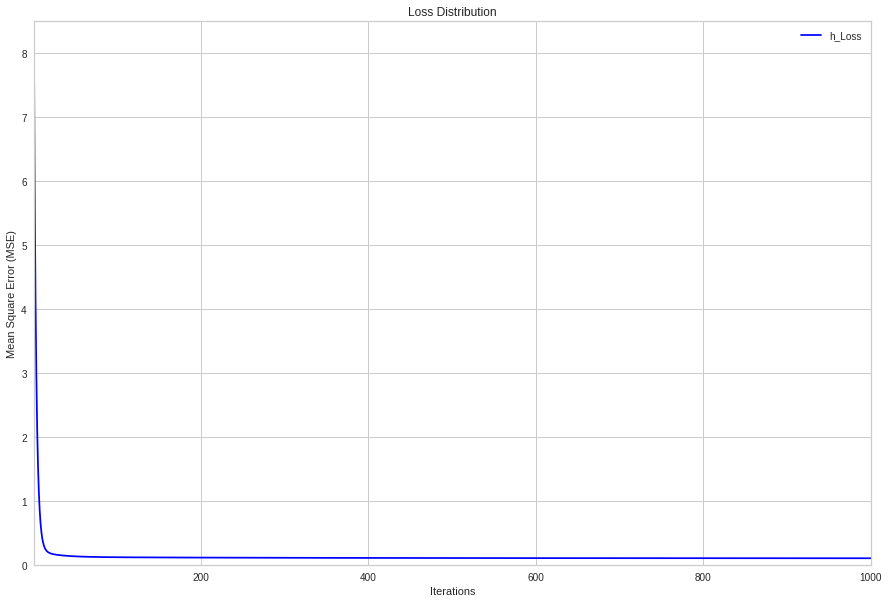

In [382]:
# Convergence

fig = plt.figure(figsize=(15,10))
plt.plot(range(1, itera + 1), hPerda, color = 'blue')
plt.xlabel('Iterations')
plt.ylabel('Mean Square Error (MSE)')
plt.legend(['h_Loss'])
plt.title('Loss Distribution')
plt.autoscale(enable=True, axis='both', tight=True)
plt.ylim([0, max(hPerda)])

In [383]:
# Variance of Inflation

pd.DataFrame({
            'variables': X_train.columns[1:],
            'VIF': [variance_inflation_factor(X_train.values, i+1) for i in range(len(X_train.columns[1:]))]
            })

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,latitude,1.025756
1,longitude,1.027018
2,number_of_reviews,1.225118
3,availability_365,1.183420
4,room_type_Entire_home_apt,inf
5,room_type_Hotel_room,inf
6,room_type_Private_room,inf
7,room_type_Shared_room,inf


> Prediction DF

In [384]:
predDF_GradDesc = pd.concat([y_test, X_test.dot(beta)], axis = 1)
predDF_GradDesc.columns = ['price_real', 'price_pred']
predDF_GradDesc['residuals'] = predDF_GradDesc.price_real - predDF_GradDesc.price_pred

predDF_GradDesc

,price_real,price_pred,residuals
0,5.298317,5.283627,0.014691
1,5.164786,4.972266,0.192520
2,5.883322,4.935932,0.947390
3,5.521461,4.953947,0.567514
4,5.298317,4.974617,0.323700
...,...,...,...
3381,5.192957,4.986463,0.206494
3382,5.298317,5.003309,0.295008
3383,3.912023,4.439690,-0.527667
3384,5.521461,5.313440,0.208021


In [385]:
print('R²:', metrics.r2_score(predDF_GradDesc['price_real'], predDF_GradDesc['price_pred']))
print('Root Mean Square Error (RMSE):', np.sqrt(metrics.mean_squared_error(predDF_GradDesc['price_real'], predDF_GradDesc['price_pred'])))

R²: 0.19551584605174155
Root Mean Square Error (RMSE): 0.471580027057491


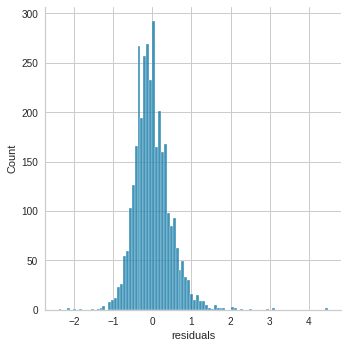

In [397]:
# Residuals Distribution
sns.displot(predDF_GradDesc.residuals)

> Homocedasticity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Residuals for Price')

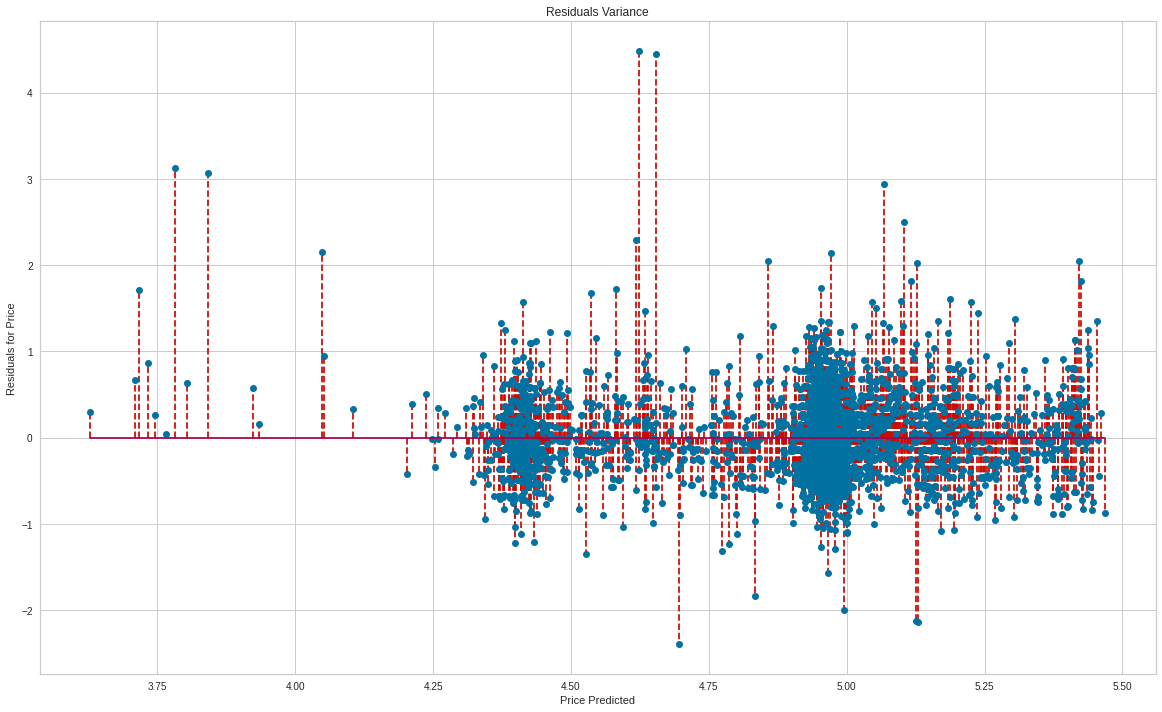

In [412]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,1,1)
plt.stem(predDF_GradDesc.price_pred, predDF_GradDesc.residuals,'--r')
ax.set_title('Residuals Variance')
ax.set_xlabel('Price Predicted')
ax.set_ylabel('Residuals for Price')

Since we don't see an essencial divergent behavior for the residuals variance, our prediction can be defined as homocedastical

#### Regularized Regression

In [414]:
# Reducing original data:
dfFinal = pd.read_csv('dfFinal.csv')
# dfFinal = dfFinal[['latitude','longitude','price','number_of_reviews','availability_365','room_type_Entire_home_apt','room_type_Hotel_room','room_type_Private_room','room_type_Shared_room']]
dfFinal.head()

,index,price,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Bijlmer_Centrum,neighbourhood_Bijlmer_Oost,neighbourhood_Bos_en_Lommer,neighbourhood_Buitenveldert_Zuidas,neighbourhood_Centrum_Oost,neighbourhood_Centrum_West,neighbourhood_De_Aker_Nieuw_Sloten,neighbourhood_De_Baarsjes_Oud_West,neighbourhood_De_Pijp_Rivierenbuurt,neighbourhood_Gaasperdam_Driemond,neighbourhood_Geuzenveld_Slotermeer,neighbourhood_IJburg_Zeeburgereiland,neighbourhood_Noord_Oost,neighbourhood_Noord_West,neighbourhood_Oostelijk_Havengebied_Indische_Buurt,neighbourhood_Osdorp,neighbourhood_Oud_Noord,neighbourhood_Oud_Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room
0,0,4.077537,-1.619836,-0.788124,0.016965,1.453104,-0.026990,4.398930,1.063668,-0.174338,0.911387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,4.779123,-1.619241,-0.787732,0.767120,0.085889,-0.026990,0.467772,-0.251123,-0.174338,-0.410479,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,4.605170,-1.618333,-0.787368,-0.023386,0.109461,-0.172432,5.491898,1.622455,0.000734,-0.279230,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,4.828314,-1.617877,-0.787413,0.458376,-0.175375,0.772939,-0.413653,-0.472995,-0.174338,1.417634,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,4.905275,-1.617665,-0.786856,1.353427,0.062877,-0.099711,3.323591,1.129408,-0.174338,1.633258,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [415]:
X_train, X_test, y_train, y_test = split_train_test(dfFinal.drop(['index','price','id','host_id'],axis=1), dfFinal.price, perc=0.2)

> Model Definition (Ridge or Lasso)

In [416]:
mdlRidge = Ridge()

> Finding the best alpha

In [417]:
grid = dict()
grid['alpha'] = np.arange(0,1,0.01)
grid

{'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99])}

In [418]:
# kFold method
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

In [419]:
# Search object
search = GridSearchCV(mdlRidge, grid, scoring = 'neg_root_mean_squared_error', cv = cv, n_jobs = -1)

# Finds the best alpha
results = search.fit(X_train, np.log(y_train))

print('Config: ', results.best_params_)

Config:  {'alpha': 0.99}


> Adjusts the model with the best alpha

In [420]:
alpha = results.best_params_['alpha']

# Model Setup
mdlRidge = Ridge(alpha=alpha)
mdlRidge.fit(X_train, np.log(y_train))

print(mdlRidge.coef_)

[ 0.00467418  0.01550553 -0.00149802 -0.01478579  0.00871331  0.00067289
  0.02310292 -0.07287633 -0.07682539 -0.00285494  0.0206937   0.05635479
  0.06901097  0.0391688   0.03173331  0.03401415 -0.07303468 -0.00646957
 -0.00982861 -0.03551719 -0.02730178 -0.02152288 -0.00201356 -0.0060562
  0.00740606  0.01215518 -0.01047439  0.01881635  0.0554222   0.07266201
  0.05093749 -0.0423239  -0.0812756 ]


> Prediction DF

In [421]:
predTest = pd.DataFrame(np.exp(mdlRidge.predict(X_test))) # Prediction using test data

predDF_Ridge = pd.concat([y_test, predTest], axis = 1)
predDF_Ridge.columns = ['price_real', 'price_pred']

# Cria os resíduos
predDF_Ridge['residuals'] = predDF_Ridge.price_real - predDF_Ridge.price_pred
predDF_Ridge

,price_real,price_pred,residuals
0,5.298317,5.377652,-0.079334
1,5.164786,4.947335,0.217451
2,5.883322,5.034306,0.849016
3,5.521461,5.150232,0.371229
4,5.298317,4.957327,0.340990
...,...,...,...
3381,5.192957,5.028952,0.164005
3382,5.298317,4.888848,0.409470
3383,3.912023,4.196535,-0.284512
3384,5.521461,5.176511,0.344950


In [422]:
print('R²:', metrics.r2_score(predDF_Ridge['price_real'], predDF_Ridge['price_pred']))
print('Root Mean Square Error (RMSE):', np.sqrt(metrics.mean_squared_error(predDF_Ridge['price_real'], predDF_Ridge['price_pred'])))

R²: 0.27258571113044905
Root Mean Square Error (RMSE): 0.44842267994876306


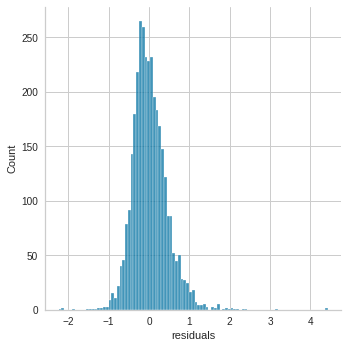

In [423]:
# Residuals Distribution
sns.displot(predDF_Ridge.residuals)

> Homocedasticity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Residuals for Price')

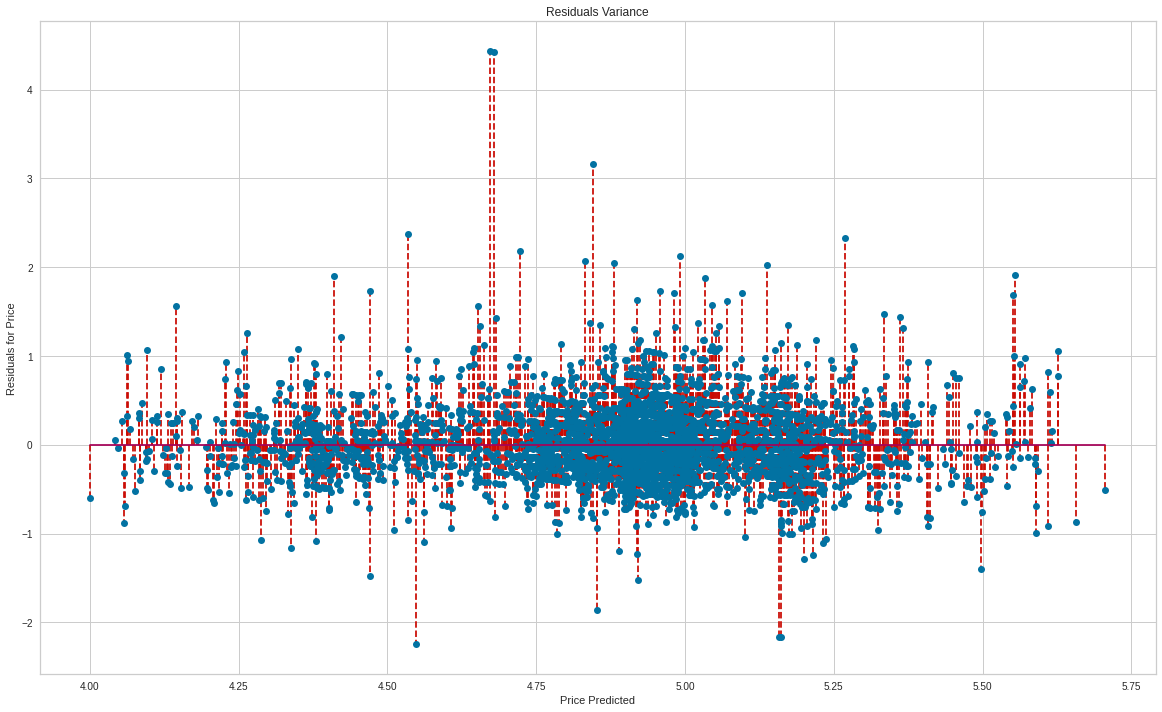

In [424]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,1,1)
plt.stem(predDF_Ridge.price_pred, predDF_Ridge.residuals,'--r')
ax.set_title('Residuals Variance')
ax.set_xlabel('Price Predicted')
ax.set_ylabel('Residuals for Price')

Since we don't see an essencial divergent behavior for the residuals variance, our prediction can be defined as homocedastical